# Notebook 14: HR Progenitor Particle Ages

This notebook will explore the different annuli and their age histograms as well as velocity dispersions.

## Setup 

In [1]:
import astropy

import matplotlib.pyplot as plt
import h5py
import pynbody
from pynbody.analysis import profile
from scipy.optimize import curve_fit

from morgans_sim_setup import *
import numpy as np
import pandas as pd

In [2]:
plt.style.use('bmh')

In [3]:
## Pathway to the simulation galaxy data: 

path_to_h329 = '/work2/09216/mmiller1/stampede2/h329.highres/h329.gsonly.004096'
## We are using 4096 present day timestep and simulation data with only gas and star particles

h329, h329_h, h329_h1 = sim_setup(path_to_h329)

loading sim
doing units
selecting halos
making faceon


In [4]:
## Setting up disk filter 

radius_d = 30
height_d = 2 ## thickness height is centered on the center defined below
center_d = (0,0,0)

## sphere filter and stars
f_sphere = pynbody.filt.Sphere(radius_d, center_d)
h329_s_sphere = h329.s[f_sphere]

pynbody.analysis.angmom.faceon(h329_s_sphere)

## disk filter and stars
f_disk = pynbody.filt.Disc(radius_d, height_d, center_d)
h329_s_disk = h329_s_sphere[f_disk]


In [5]:
## Now setting up vertical profiles using our filters (created in cell above) on h329 galaxy

h329_p_s_vert_sliced = profile.VerticalProfile(h329_s_disk, '5 kpc', '20 kpc', '2 kpc') ## vertical profile
h329_p_s_sliced = pynbody.analysis.profile.Profile(h329_s_disk, vmin =.01) ## radial profile

## Creating Annuli

In the Notebook 10 we did an annulus around 20 kpc (19-21), and in notebook 12 we did around 10, 15, and 25 kpc. Below, to look at all the age histograms, I am including all the annuli ranges.

*Note: the filtering below 10 kpc messes with the number of star particles within the simulation to be zero for some reason - so rather than 9-11 kpc range I did 10 - 12 kpc range. I cannot find anything wrong with my code and the way I'm filtering, so for now I am using slightly shifted range which doesn't make the length = 0 within the simulation snapshot.*

In [6]:
in_r_10 = '10 kpc' ## I varied these from 9-11 to 7 -13 and somehow they're still not any length??????
out_r_10 = '12 kpc'

f_ann_10 = pynbody.filt.Annulus(in_r_10, out_r_10, center_d)

h329_s_ann_10 = h329_s_disk[f_ann_10]

h329_p_s_ann_10 = pynbody.analysis.profile.Profile(h329_s_ann_10, vmin =.01)


In [7]:
## Def edges of annulus
in_r_15 = '14 kpc'
out_r_15 = '16 kpc'

in_r_20 = '19 kpc'
out_r_20 = '21 kpc'

in_r_25 = '24 kpc'
out_r_25 = '26 kpc'

## Annulus Filter
f_ann_15 = pynbody.filt.Annulus(in_r_15, out_r_15, center_d) ## center_d defined earlier as (0,0,0)
f_ann_20 = pynbody.filt.Annulus(in_r_20, out_r_20, center_d)
f_ann_25 = pynbody.filt.Annulus(in_r_25, out_r_25, center_d)

## h329 sim of stars in disk around the annulus filter
h329_s_ann_15 = h329_s_disk[f_ann_15]
h329_s_ann_20 = h329_s_disk[f_ann_20]
h329_s_ann_25 = h329_s_disk[f_ann_25]


## New radial profile with annulus
h329_p_s_ann_15 = pynbody.analysis.profile.Profile(h329_s_ann_15, vmin =.01)
h329_p_s_ann_20 = pynbody.analysis.profile.Profile(h329_s_ann_20, vmin =.01)
h329_p_s_ann_25 = pynbody.analysis.profile.Profile(h329_s_ann_25, vmin =.01)


## Tracing Stars in Annuli Using Bridges

Using bridges to trace between snapshots: https://pynbody.github.io/pynbody/tutorials/bridge.html

In [8]:
## Pathway to the simulation galaxy data from 4032 timestep (z=0.1 ish?)

path_to_h329_4032 = '/work2/09216/mmiller1/stampede2/h329.highres/h329.gsonly.004032'
## We are using 4032 

h329_4032, h329_h_4032, h329_h1_4032 = sim_setup(path_to_h329_4032)

loading sim
doing units
selecting halos
making faceon


They say "f1 and f2" in bridges documentation. Mine are called "h329 and h329_4032" - equivalent to "sim" in my simsetup function

In [9]:
## Creating the bridge object

bridge = h329.bridge(h329_4032)

In [10]:
## Making progenitor particles for the different annuli

## this is where the 4096 particles are that we selected, but in the 4032 snapshot
progen_10 = bridge(h329_s_ann_10) 
progen_15 = bridge(h329_s_ann_15)
progen_20 = bridge(h329_s_ann_20)
progen_25 = bridge(h329_s_ann_25)


In [11]:
## the radial profile of the progenitor particles (has annulus still)

h329_p_s_progen_10 = pynbody.analysis.profile.Profile(progen_10.s, vmin =.01)
h329_p_s_progen_15 = pynbody.analysis.profile.Profile(progen_15.s, vmin =.01)
h329_p_s_progen_20 = pynbody.analysis.profile.Profile(progen_20.s, vmin =.01)
h329_p_s_progen_25 = pynbody.analysis.profile.Profile(progen_25.s, vmin =.01)


## Making Sure Simulations Have Same Shapes

No new stars around 25 kpc were created between timesteps 4032 and 4096, but the rest must be filtered.

In [12]:
## create the filter which gets rid of any stars created between timesteps 4032 and 4096

time_1 = h329_4032.properties['time']

In [13]:
## Apply the filter to each

h329_s_ann_10 = h329_s_ann_10[h329_s_ann_10['tform'] < time_1]
h329_s_ann_15 = h329_s_ann_15[h329_s_ann_15['tform'] < time_1]
h329_s_ann_20 = h329_s_ann_20[h329_s_ann_20['tform'] < time_1]

## Age Histograms

Creating age histograms for each of the progenitor particle stars in the 4032 snapshot that eventually migrate to the specified annuli in present day. 

### Progenitor Particles that Migrate to Around 10 kpc Annulus

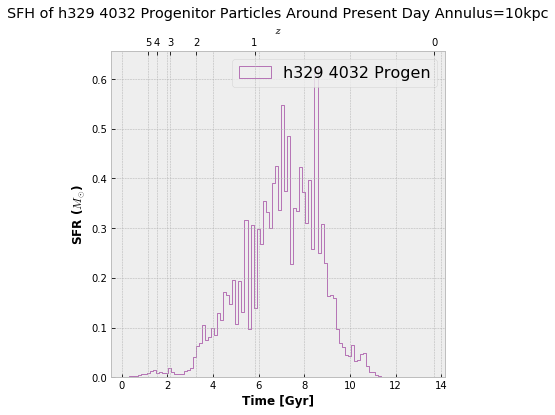

In [14]:
fig = plt.figure(figsize=[6,6])

pynbody.plot.stars.sfh(h329_s_ann_10,bins=100, color='purple', label = 'h329 4032 Progen')
plt.legend(fontsize=16)
plt.xlabel('Time [Gyr]', fontweight='bold')
plt.ylabel(r'SFR ($M_{\odot}$)', fontweight='bold')
plt.title('SFH of h329 4032 Progenitor Particles Around Present Day Annulus=10kpc')
plt.tick_params(axis='both', which='major')

### Progenitor Particles that Migrate to Around 15 kpc Annulus

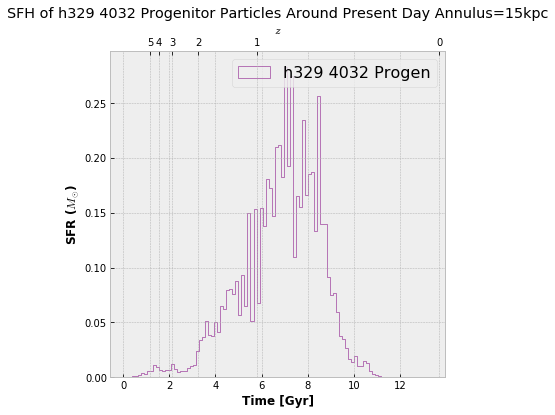

In [15]:
fig = plt.figure(figsize=[6,6])

pynbody.plot.stars.sfh(h329_s_ann_15,bins=100, color='purple', label = 'h329 4032 Progen')
plt.legend(fontsize=16)
plt.xlabel('Time [Gyr]', fontweight='bold')
plt.ylabel(r'SFR ($M_{\odot}$)', fontweight='bold')
plt.title('SFH of h329 4032 Progenitor Particles Around Present Day Annulus=15kpc')
plt.tick_params(axis='both', which='major')

### Progenitor Particles that Migrate to Around 20 kpc Annulus

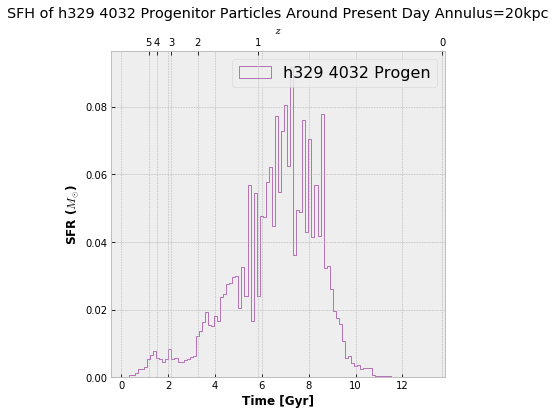

In [16]:
fig = plt.figure(figsize=[6,6])

pynbody.plot.stars.sfh(h329_s_ann_20,bins=100, color='purple', label = 'h329 4032 Progen')
plt.legend(fontsize=16)
plt.xlabel('Time [Gyr]', fontweight='bold')
plt.ylabel(r'SFR ($M_{\odot}$)', fontweight='bold')
plt.title('SFH of h329 4032 Progenitor Particles Around Present Day Annulus=20kpc')
plt.tick_params(axis='both', which='major')

### Progenitor Particles that Migrate to Around 25 kpc Annulus

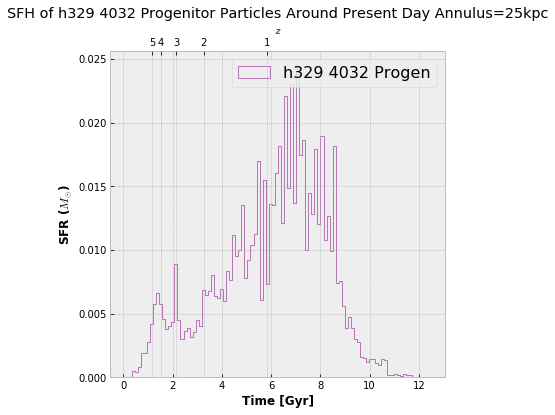

In [17]:
fig = plt.figure(figsize=[6,6])

pynbody.plot.stars.sfh(h329_s_ann_25,bins=100, color='purple', label = 'h329 4032 Progen')
plt.legend(fontsize=16)
plt.xlabel('Time [Gyr]', fontweight='bold')
plt.ylabel(r'SFR ($M_{\odot}$)', fontweight='bold')
plt.title('SFH of h329 4032 Progenitor Particles Around Present Day Annulus=25kpc')
plt.tick_params(axis='both', which='major')

## Reflections on Age Histograms

Something to notice is that there are a lot more stars, and much higher star formation rates, as the annuli get closer and closer to the center of the galaxy. So the y axes have fairly different scales to accomadate the difference in populations.

Also the middle of the peak in star formation rate for each SFH tends to shift a bit - usually staying around about 7 Gyr.

In general though, for each set of progenitor particles, the age of formation for each group drops off around 9 Gyr-ish. So there are not high rates of star formation going on in the last ~ 4-ish Gyr for any of the progenitor star populations. Thus, the stars that are migrating are not necessarily based off being young. 

# Velocity Dispersions

We're only going to be looking at comparing around the 7-20 kpc range (where most of our annuli are being analyzed from) - so we will be limiting all velocity dispersion graphs on the x axis to 0-25 kpc so as not to reflect the entirity of the galaxy's radius. 

## Comparing vz_disp for all the Different Annuli

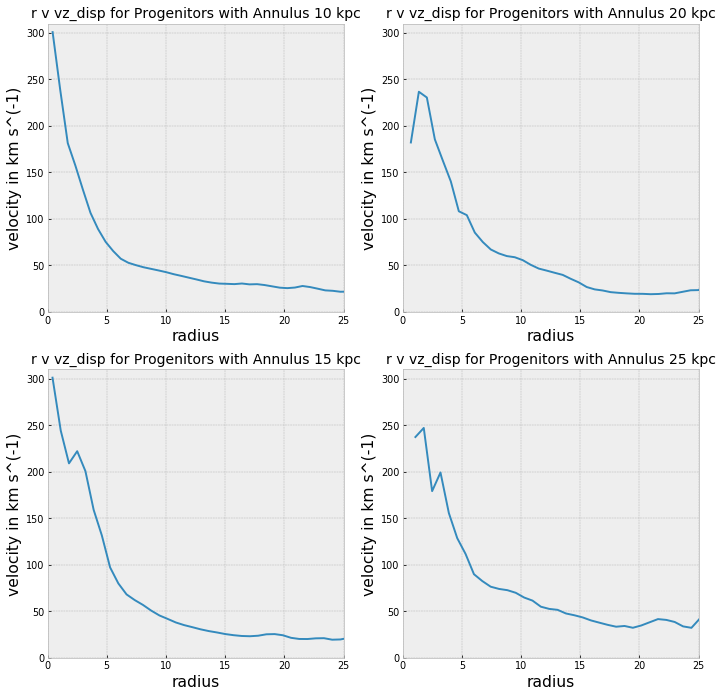

In [22]:
## graphing r versus velocity dispersion of the h329 progenitor particles that are moving to the original annuli

fig, axs = plt.subplots(2, 2, figsize=[12, 12], dpi=70)

axs[0,0].plot(h329_p_s_progen_10['rbins'].in_units('kpc'), h329_p_s_progen_10['vz_disp'].in_units('km s**-1'))
axs[0,0].set_xlabel('radius', fontsize=16)
axs[0,0].set_ylabel('velocity in km s^(-1)', fontsize=16)
axs[0,0].set_title('r v vz_disp for Progenitors with Annulus 10 kpc')
axs[0,0].set_ylim(0,310)
axs[0,0].set_xlim(0,25) ## only want to look at around the 7-20 kpc range - I included some buffer room too 

axs[1,0].plot(h329_p_s_progen_15['rbins'].in_units('kpc'), h329_p_s_progen_15['vz_disp'].in_units('km s**-1'))
axs[1,0].set_xlabel('radius', fontsize=16)
axs[1,0].set_ylabel('velocity in km s^(-1)', fontsize=16)
axs[1,0].set_title('r v vz_disp for Progenitors with Annulus 15 kpc')
axs[1,0].set_ylim(0,310)
axs[1,0].set_xlim(0,25)

axs[0,1].plot(h329_p_s_progen_20['rbins'].in_units('kpc'), h329_p_s_progen_20['vz_disp'].in_units('km s**-1'))
axs[0,1].set_xlabel('radius', fontsize=16)
axs[0,1].set_ylabel('velocity in km s^(-1)', fontsize=16)
axs[0,1].set_title('r v vz_disp for Progenitors with Annulus 20 kpc')
axs[0,1].set_ylim(0,310)
axs[0,1].set_xlim(0,25)

axs[1,1].plot(h329_p_s_progen_25['rbins'].in_units('kpc'), h329_p_s_progen_25['vz_disp'].in_units('km s**-1'))
axs[1,1].set_xlabel('radius', fontsize=16)
axs[1,1].set_ylabel('velocity in km s^(-1)', fontsize=16)
axs[1,1].set_title('r v vz_disp for Progenitors with Annulus 25 kpc')
axs[1,1].set_ylim(0,310)
axs[1,1].set_xlim(0,25);


### Overall vz_disp for h329 4032 (All Stars)

In [20]:
## Need to make the radial profile for the h329 halo 1 of the previous timestep (4032) - since I didn't include it before

h329_4032_p_s = pynbody.analysis.profile.Profile(h329_h1_4032.s, vmin =.01)

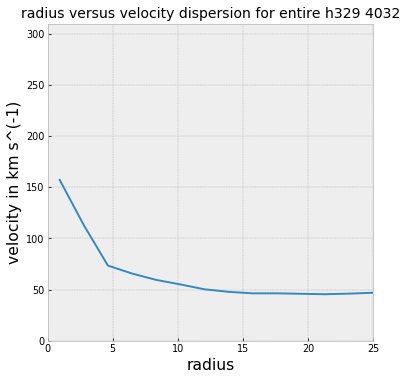

In [25]:
## graphing r versus velocity dispersion of the h329 progenitor particles that are moving to the original annuli

fig, axs = plt.subplots(figsize=[6, 6], dpi=70)

plt.plot(h329_4032_p_s['rbins'].in_units('kpc'), h329_4032_p_s['vz_disp'].in_units('km s**-1'))
plt.xlabel('radius', fontsize=16)
plt.ylabel('velocity in km s^(-1)', fontsize=16)
plt.title('radius versus velocity dispersion for entire h329 4032')
plt.ylim(0,310) ## setting y lim as the same as the above graphs' so that it's easy to compare
plt.xlim(0, 25); ## we only want to look at about the 7-20 kpc range so I included some buffer room to look at the boundaries

## Reflections on Velocity Dispersion (in the z-direction)

The overall galaxy tends to have a velocity dispersion in the z-direction (for particles between ~ 7-20 kpc) of about 50 km/s - which is pretty consistently true over our entire 7-20 kpc range.

In comparison, all the progenitor particles' profiles, tend to dip substationally below that 50 km/s line (save for the 25 kpc annulus range - that one dips below at around 12.5 kpc). For the 10, 15, and 20 kpc they all drop fairly far below 50 km/s - with some going less than half that (ex: in the 20 kpc annulus graph). 

So, progenitor particles, in the range of 7-20 kpc radius, tend to have lower z-direction velocity dispersions. 

## Comparing vr_disp for all the Different Annuli

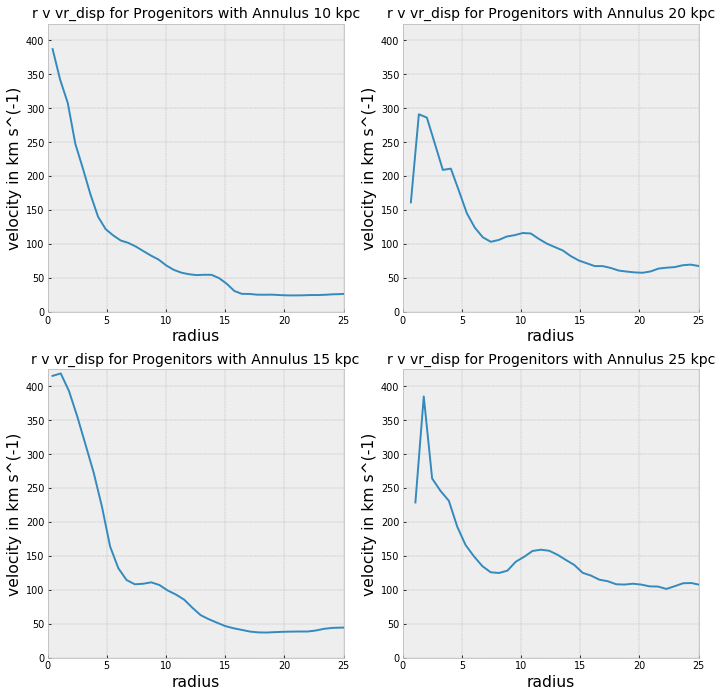

In [27]:
## graphing r versus velocity dispersion of the h329 progenitor particles that are moving to the original annuli

fig, axs = plt.subplots(2, 2, figsize=[12, 12], dpi=70)

axs[0,0].plot(h329_p_s_progen_10['rbins'].in_units('kpc'), h329_p_s_progen_10['vr_disp'].in_units('km s**-1'))
axs[0,0].set_xlabel('radius', fontsize=16)
axs[0,0].set_ylabel('velocity in km s^(-1)', fontsize=16)
axs[0,0].set_title('r v vr_disp for Progenitors with Annulus 10 kpc')
axs[0,0].set_ylim(0,425)
axs[0,0].set_xlim(0,25) ## only want to look at around the 7-20 kpc range - I included some buffer room too 

axs[1,0].plot(h329_p_s_progen_15['rbins'].in_units('kpc'), h329_p_s_progen_15['vr_disp'].in_units('km s**-1'))
axs[1,0].set_xlabel('radius', fontsize=16)
axs[1,0].set_ylabel('velocity in km s^(-1)', fontsize=16)
axs[1,0].set_title('r v vr_disp for Progenitors with Annulus 15 kpc')
axs[1,0].set_ylim(0,425)
axs[1,0].set_xlim(0,25)

axs[0,1].plot(h329_p_s_progen_20['rbins'].in_units('kpc'), h329_p_s_progen_20['vr_disp'].in_units('km s**-1'))
axs[0,1].set_xlabel('radius', fontsize=16)
axs[0,1].set_ylabel('velocity in km s^(-1)', fontsize=16)
axs[0,1].set_title('r v vr_disp for Progenitors with Annulus 20 kpc')
axs[0,1].set_ylim(0,425)
axs[0,1].set_xlim(0,25)

axs[1,1].plot(h329_p_s_progen_25['rbins'].in_units('kpc'), h329_p_s_progen_25['vr_disp'].in_units('km s**-1'))
axs[1,1].set_xlabel('radius', fontsize=16)
axs[1,1].set_ylabel('velocity in km s^(-1)', fontsize=16)
axs[1,1].set_title('r v vr_disp for Progenitors with Annulus 25 kpc')
axs[1,1].set_ylim(0,425)
axs[1,1].set_xlim(0,25);

### Overall vr_disp for h329 4032 (All Stars)

We're only going to be looking at comparing around the 5-20 kpc range (where most of our annuli are being analyzed from) - so we will be limiting the x axis not to reflect the entirity of the galaxy's radius. 

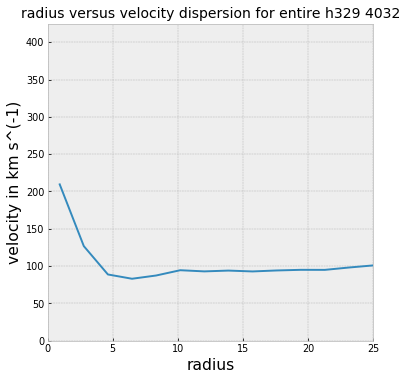

In [28]:
## graphing r versus velocity dispersion of the h329 progenitor particles that are moving to the original annuli

fig, axs = plt.subplots(figsize=[6, 6], dpi=70)

plt.plot(h329_4032_p_s['rbins'].in_units('kpc'), h329_4032_p_s['vr_disp'].in_units('km s**-1'))
plt.xlabel('radius', fontsize=16)
plt.ylabel('velocity in km s^(-1)', fontsize=16)
plt.title('radius versus velocity dispersion for entire h329 4032')
plt.ylim(0,425) ## same limits as above graphs
plt.xlim(0, 25); ## we only want to look at about the 7-20 kpc range so I included some buffer room to look at the boundaries

# Overall Reflections on Velocity Dispersion

Interesting Note: I saw that for the 20 kpc annulus, which was the one that we observed the most strong/distinct sprial structure within the progenitor particles - we had both some of the lowest z-direction velocity dispersions and some of the highest (relatively - if comparing to different annuli) radial direction velocity dispersions (with only the 25 kpc annulus beating the 20 kpc in radial velocity dispersion). 

Both the 10 kpc and 15 kpc tend to act very similarly in terms of having fairly low z-direction velocity dispersion as well as pretty low radial direction velocity dispersion, in comparison to the other annuli's velocity dispersions.

Could spiral structure be more apparent and distinct in the annuli where there is both low z-direction velocity dispersion and high radial velocity dispersion?

To address the 25 kpc annulus: it (like around 20 kpc) also has fairly low z-direction velocity dispersion but it's dip in z dispersion starts a bit later in its radius. On the other hand, it has very high radial velocity dispersion (higher than the overall galaxy in the range of about 7-20 kpc) - but as we have seen there are significantly less progenitor particle stars within our 24-26 kpc range, so we're basing this off a much smaller population. Along with that, the stellar render for the 25 kpc annulus (seen in notebook 12) has progenitor stars coming from all over the galaxy (some from much further out radii). This high level of radial direction velocity dispersion could be related to how far the stars must travel and that there is a lot more chaotic motion happening for stars to migrate to the 25 kpc area in present day. 

# End